In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils'
#sys.path.append(folder)
sys.path.insert(0, folder)

In [2]:
from google.colab import drive
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [0]:
from torchvision import transforms
from helper import HelperModel
from dataset_info import DataSetInfo
from dataloader import DataLoader
from model import CIFARNet1
from transforms import Transform
from train import Train
from test import Test
from plot import Plot

### Create model and display summary

In [4]:
model_obj = CIFARNet1()
# create object for Model
device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model_obj)

#display summaru of model
helper_obj.display_model_summay(model, (3, 32, 32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
         Dropout2d-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,048
      BatchNorm2d-11           [-1, 32, 16, 16]              64
             ReLU-12           [-1, 32, 16, 16]               0
        Dropout2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils/model.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


### Get data set object

In [0]:
data_set_obj = DataSetInfo("cifa", "./data")


### Get the train test transforms 

In [0]:
#Create Image Transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_obj = Transform(train_transforms=transform, test_transforms=transform)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [7]:
train_set = data_set_obj.get_train_dataset(train_transforms)
test_set = data_set_obj.get_test_dataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


### Load the train and test data

In [8]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=128)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

plane  dog deer


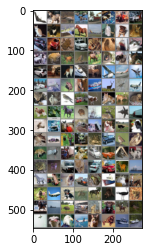

In [9]:
import torchvision
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%4s' % classes[labels[j]] for j in range(3)))

### Run the model

In [10]:
optimizer = helper_obj.get_l2_regularizer()
EPOCHS = 41
#l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []
for epoch in range(1, EPOCHS):
    print("EPOCH:", epoch)
    train_obj.train(model, device, train_loader, optimizer, l1_factor=None)
    test_obj.test(model, device, test_loader, misclassfied_required=True)
    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])
miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils/model.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train Set: Train Loss=1.6845916509628296 Batch_id=390 Accuracy=25.28: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6249, Accuracy: 3950/10000 (39.50%)

EPOCH: 2


Train Set: Train Loss=1.5216639041900635 Batch_id=390 Accuracy=37.88: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4005, Accuracy: 4739/10000 (47.39%)

EPOCH: 3


Train Set: Train Loss=1.4247422218322754 Batch_id=390 Accuracy=44.25: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2434, Accuracy: 5471/10000 (54.71%)

EPOCH: 4


Train Set: Train Loss=1.3001456260681152 Batch_id=390 Accuracy=48.64: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1735, Accuracy: 5787/10000 (57.87%)

EPOCH: 5


Train Set: Train Loss=1.538759708404541 Batch_id=390 Accuracy=52.26: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0873, Accuracy: 6062/10000 (60.62%)

EPOCH: 6


Train Set: Train Loss=1.1324055194854736 Batch_id=390 Accuracy=54.83: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0247, Accuracy: 6281/10000 (62.81%)

EPOCH: 7


Train Set: Train Loss=1.1668399572372437 Batch_id=390 Accuracy=57.45: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9961, Accuracy: 6472/10000 (64.72%)

EPOCH: 8


Train Set: Train Loss=0.9457322955131531 Batch_id=390 Accuracy=59.22: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9275, Accuracy: 6706/10000 (67.06%)

EPOCH: 9


Train Set: Train Loss=0.9096084833145142 Batch_id=390 Accuracy=61.07: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8970, Accuracy: 6823/10000 (68.23%)

EPOCH: 10


Train Set: Train Loss=1.0734282732009888 Batch_id=390 Accuracy=62.38: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8842, Accuracy: 6948/10000 (69.48%)

EPOCH: 11


Train Set: Train Loss=1.0274879932403564 Batch_id=390 Accuracy=64.22: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8315, Accuracy: 7145/10000 (71.45%)

EPOCH: 12


Train Set: Train Loss=1.0724706649780273 Batch_id=390 Accuracy=64.87: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8189, Accuracy: 7107/10000 (71.07%)

EPOCH: 13


Train Set: Train Loss=1.0829172134399414 Batch_id=390 Accuracy=66.04: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7834, Accuracy: 7307/10000 (73.07%)

EPOCH: 14


Train Set: Train Loss=0.9377090334892273 Batch_id=390 Accuracy=67.23: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7549, Accuracy: 7366/10000 (73.66%)

EPOCH: 15


Train Set: Train Loss=0.8529624938964844 Batch_id=390 Accuracy=67.85: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7559, Accuracy: 7404/10000 (74.04%)

EPOCH: 16


Train Set: Train Loss=0.8623183965682983 Batch_id=390 Accuracy=69.14: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7519, Accuracy: 7333/10000 (73.33%)

EPOCH: 17


Train Set: Train Loss=0.6218167543411255 Batch_id=390 Accuracy=69.99: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6994, Accuracy: 7572/10000 (75.72%)

EPOCH: 18


Train Set: Train Loss=0.8785958290100098 Batch_id=390 Accuracy=70.56: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6857, Accuracy: 7648/10000 (76.48%)

EPOCH: 19


Train Set: Train Loss=0.9821022748947144 Batch_id=390 Accuracy=71.03: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6817, Accuracy: 7663/10000 (76.63%)

EPOCH: 20


Train Set: Train Loss=0.8774675130844116 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6617, Accuracy: 7742/10000 (77.42%)

EPOCH: 21


Train Set: Train Loss=0.7464351654052734 Batch_id=390 Accuracy=72.51: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6737, Accuracy: 7707/10000 (77.07%)

EPOCH: 22


Train Set: Train Loss=0.7501300573348999 Batch_id=390 Accuracy=72.92: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6485, Accuracy: 7817/10000 (78.17%)

EPOCH: 23


Train Set: Train Loss=0.796410083770752 Batch_id=390 Accuracy=73.34: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6355, Accuracy: 7884/10000 (78.84%)

EPOCH: 24


Train Set: Train Loss=0.6790076494216919 Batch_id=390 Accuracy=73.43: 100%|██████████| 391/391 [00:31<00:00, 12.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6496, Accuracy: 7760/10000 (77.60%)

EPOCH: 25


Train Set: Train Loss=0.9581738710403442 Batch_id=390 Accuracy=74.28: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6351, Accuracy: 7823/10000 (78.23%)

EPOCH: 26


Train Set: Train Loss=0.9496973156929016 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6422, Accuracy: 7795/10000 (77.95%)

EPOCH: 27


Train Set: Train Loss=0.681104838848114 Batch_id=390 Accuracy=74.48: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6038, Accuracy: 7941/10000 (79.41%)

EPOCH: 28


Train Set: Train Loss=0.9550768136978149 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6004, Accuracy: 8007/10000 (80.07%)

EPOCH: 29


Train Set: Train Loss=0.7302714586257935 Batch_id=390 Accuracy=75.13: 100%|██████████| 391/391 [00:31<00:00, 12.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6066, Accuracy: 7942/10000 (79.42%)

EPOCH: 30


Train Set: Train Loss=0.8175051808357239 Batch_id=390 Accuracy=75.29: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6171, Accuracy: 7890/10000 (78.90%)

EPOCH: 31


Train Set: Train Loss=0.7183343768119812 Batch_id=390 Accuracy=75.77: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6113, Accuracy: 7905/10000 (79.05%)

EPOCH: 32


Train Set: Train Loss=0.7920325994491577 Batch_id=390 Accuracy=76.01: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5924, Accuracy: 7999/10000 (79.99%)

EPOCH: 33


Train Set: Train Loss=0.718783974647522 Batch_id=390 Accuracy=76.13: 100%|██████████| 391/391 [00:31<00:00, 12.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5846, Accuracy: 8043/10000 (80.43%)

EPOCH: 34


Train Set: Train Loss=0.589499831199646 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6021, Accuracy: 7952/10000 (79.52%)

EPOCH: 35


Train Set: Train Loss=0.7211443185806274 Batch_id=390 Accuracy=76.33: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6065, Accuracy: 7940/10000 (79.40%)

EPOCH: 36


Train Set: Train Loss=0.7500718832015991 Batch_id=390 Accuracy=76.35: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6067, Accuracy: 7934/10000 (79.34%)

EPOCH: 37


Train Set: Train Loss=0.5919119715690613 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5880, Accuracy: 8000/10000 (80.00%)

EPOCH: 38


Train Set: Train Loss=0.7402472496032715 Batch_id=390 Accuracy=76.63: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5974, Accuracy: 8017/10000 (80.17%)

EPOCH: 39


Train Set: Train Loss=0.6600571870803833 Batch_id=390 Accuracy=76.68: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5710, Accuracy: 8084/10000 (80.84%)

EPOCH: 40


Train Set: Train Loss=0.6405118107795715 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]



Test set: Average loss: 0.5785, Accuracy: 8086/10000 (80.86%)

Maximum Training Accuracy =  76.91
Maximum Testing Accuracy =  80.86


### Display graphs

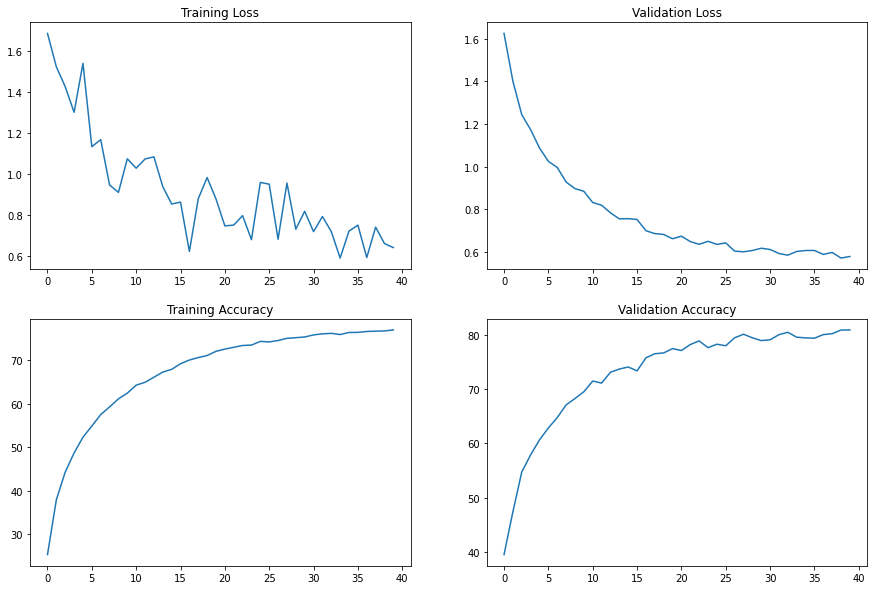

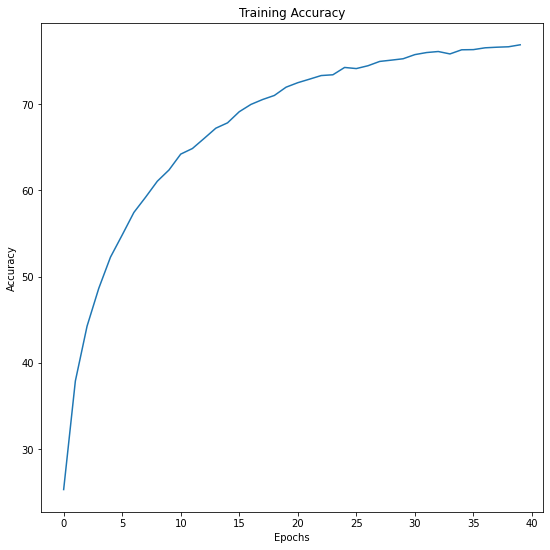

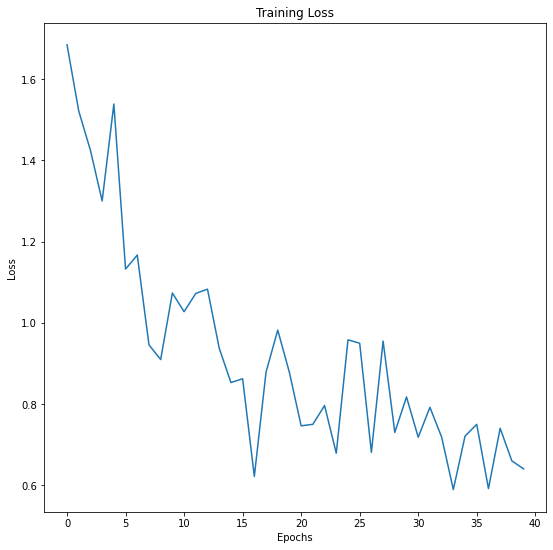

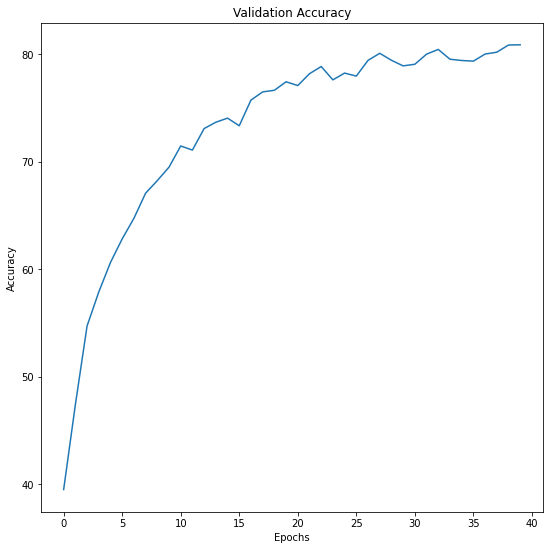

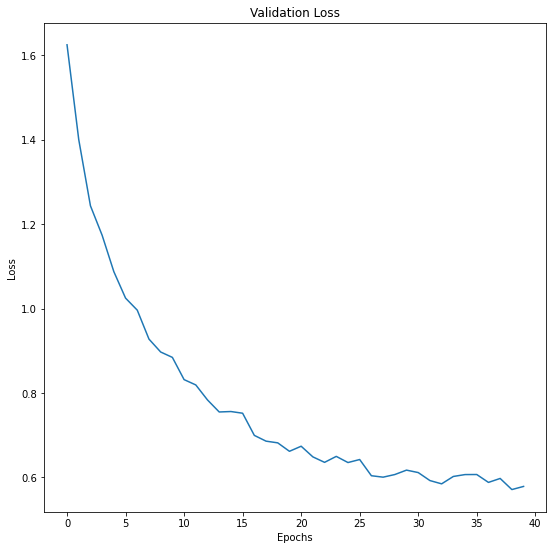

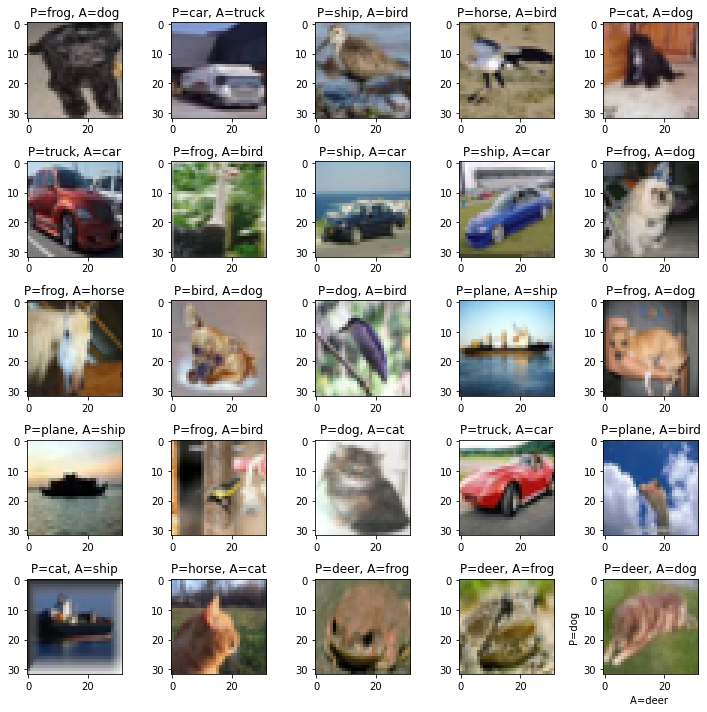

In [12]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
#plot train accuracy graph
plt_obj.plot_train_graph()
#plot train loss graph
plt_obj.plot_train_graph(plot_case="Loss")
#plot validation accuracy graph
plt_obj.plot_validation_graph()
#plot validation loss graph
plt_obj.plot_validation_graph(plot_case="Loss")
#plot 25 misclassified images
Plot.plot_cifar_misclassified_images(miscassified_images)